## 1. Introduction
> With the increasing popularity of online payments, the risk of fraudulent transactions is also rising. This poses a significant financial threat to both businesses and consumers. The objective of this analysis is to identify the patterns between fraudulent and non-fraudulent payments to help customers to identify the legitimacy of their transactions. 

## 2. Import Needed Libraries and Dataset
> The dataset is collected from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. Link to source: https://www.kaggle.com/datasets/ealaxi/paysim1/data.
> To better understand the dataset, here's the basic information about the dataset:
> * Step: A unit where 1 step equals 1 hour
> * Type: Type of Online Transaction
> * Amount: Amount in Transaction
> * nameOrig: Name of the customer (more like codenames)
> * oldbalanceOrg: Balance of the sender before transaction
> * newbalanceOrig: Balance of the sender after transaction
> * nameDest: Name of the receipent (Destination)
> * oldbalanceDest: Balance of the receipent before transaction
> * newbalanceDest: Balance of the receipent after transaction
> * isFraud: Is it a fraud?
> * isFlaggedFraud: Did the system detect it was a fraud?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("onlinefraud.csv")

## 3. Data Cleaning

In [3]:
# Checking the total numbers of empty values in each column
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

> There are no missing values

In [4]:
# Getting the information about the dataset, to check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


> * Columns associated with money amount are type float64
> * Columns associated with name ar type object
> * Columns associated with boolean types ar int64 except step which represents count of hours

In [5]:
print("Amount of duplicated values in df: " , df.duplicated().sum())

Amount of duplicated values in df:  0


>There are no duplicate values

In [6]:
# Rename some of the original column headers for consistency
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
df.head(1)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0


> ### Data cleaning process is done:
> * There are no missing values.
> * There are no wrong data types.
> * There are no duplicate values.
> * Rename some original column headers for consistency reading.

## 4. Exploratory Data Analysis (EDA) & Data Visualization

In [7]:
# Read the 1st 5rows to explore the data
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


>There are several columns we can explore to know more about fraudulent and non-fraudulent transactions. Which includes: `type`, `isFraud`.

In [8]:
# Read the shape (rows, cols) of dataset
df.shape

(6362620, 11)

In [9]:
# Describe the dataset
df.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
# Describe the dataset including object columns
df.describe(include=['object'])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [11]:
# Check the unique values in the column 'type'
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

>By looking at the numbers, it's hard to visualize the proportions of each transaction.
> Thus, we will plot a countplot to better visualize the distribution of dataframe column `type`.

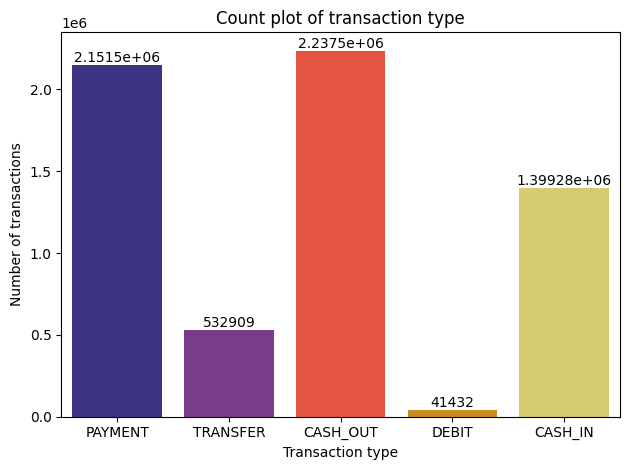

In [12]:
# Using seaborn package to plot the count of each type of transaction
# Type of plot used is countplot
ax = sns.countplot(x='type', data=df, palette='CMRmap')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.xlabel('Transaction type')
plt.ylabel('Number of transactions')
plt.tight_layout()

>From the plot, we can see that cast_out is the most transaction type, followed by payment, cast_in, transfer and debit.
<br><br>
Next, we want to perform analysis on the `isFraud` column.

In [13]:
# Check the unique values in the column 'isFraud'
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

> Again we can use countplot to visualize the dataframe column `isFraud`.

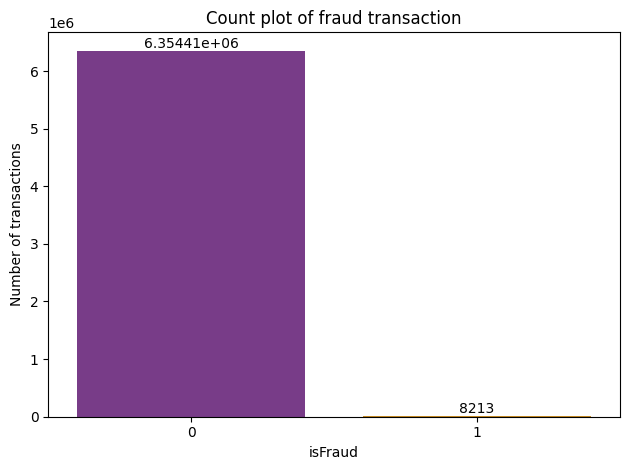

In [14]:
ax = sns.countplot(x='isFraud', data=df, palette='CMRmap')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')
plt.tight_layout()

> Next, we want to identify which transaction type are fraudulent.

In [15]:
fraudulent_types = df[df['isFraud'] == 1]['type'].value_counts()
print(fraudulent_types)

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64


> After running the above code cell, we can see that only type `cash_out` and `transfer` involved with fraudulent transaction. `cash_out` has 4116 frauds and `transfer` has 4097 frauds. Next, let's plot a countplot to better visualize the result.

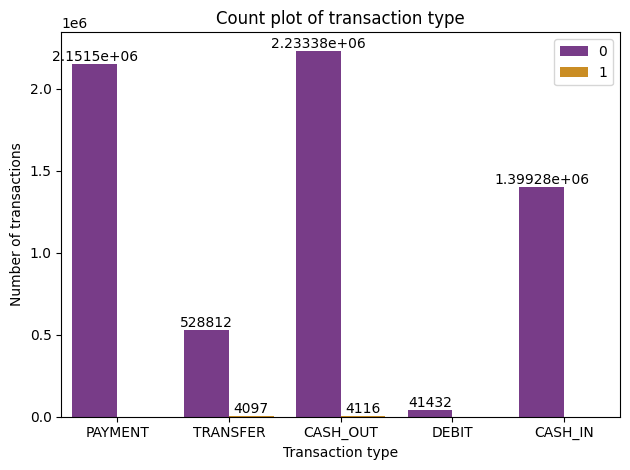

In [16]:
ax = sns.countplot(x='type', data=df, hue='isFraud', palette='CMRmap')
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Count plot of transaction type')
ax.legend(loc='best')
ax.set_ylabel('Number of transactions')
ax.set_xlabel('Transaction type')
plt.tight_layout()

## 5. Data Mining / Data Modelling

#### 5.1 Data Mining: Clustering & Association Rule Mining

#### 5.2 Data Modelling: Building Predictive Models

In [54]:
# Create a copy of the original dataframe
df_model = df.copy()

> In order to train a ML model, we need to normalize the dataframe. To do that, we can use `scikit-learn` package's `LabelEncoder` to normalize our data.

In [55]:
# Normalizing the transaction types to better train the data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_cat = df_model['type'].values
df_cat_encoded = encoder.fit_transform(df_cat)
df_cat_encoded

array([3, 3, 4, ..., 1, 4, 1])

In [56]:
df_model['type'] = encoder.fit_transform(df_model['type'])
df_model.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


> Drop columns with object type to plot a heatmap for correlation matrix.

In [57]:
df_model = df_model.drop(columns = ['nameOrig', 'nameDest'])

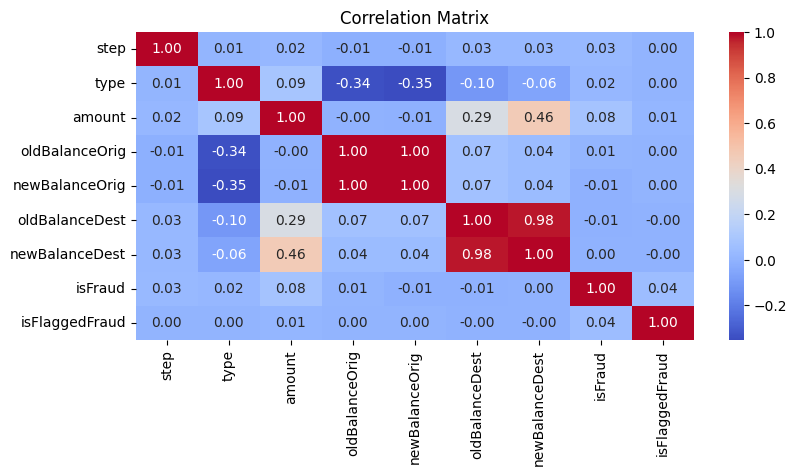

In [53]:
# checking features correlation
corr = df_model.corr()
plt.figure(figsize=(9,4))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

>The heatmap provides a visual representation of the correlation matrix, where each cell represents the correlation between two features. The color of each cell indicates the strength of the correlation, with warmer colors (e.g., red) indicating a stronger positive correlation, and cooler colors (e.g., blue) indicating a stronger negative correlation. The numbers within each cell represent the correlation coefficient.
>
>By examining the heatmap, you can quickly identify patterns and relationships between different features in your dataset. This can help you understand which features are strongly correlated, which can be useful for feature selection, identifying multicollinearity, or gaining insights into the relationships within your data.

#### Model Training